In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from math import sin
import pandas as pd
import os
import numpy as np

In [2]:
accountDB = pd.read_csv('data/account.csv', sep=";")
accountDB

,account_id,district_id,frequency,date
0,576,55,monthly issuance,930101
1,3818,74,monthly issuance,930101
2,704,55,monthly issuance,930101
3,2378,16,monthly issuance,930101
4,2632,24,monthly issuance,930102
...,...,...,...,...
4495,124,55,monthly issuance,971228
4496,3958,59,monthly issuance,971228
4497,777,30,monthly issuance,971228
4498,1573,63,monthly issuance,971229


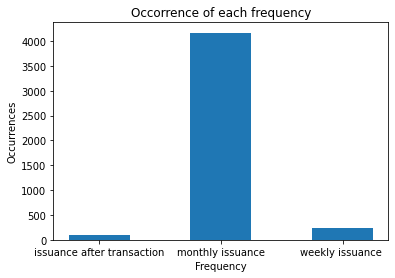

In [3]:
plt.ylabel("Occurrences")
plt.xlabel("Frequency")
plt.title("Occorrence of each frequency")
plt.bar(["issuance after transaction", "monthly issuance", "weekly issuance "],list(accountDB.pivot_table(columns=["frequency"],aggfunc="size")), width=0.5)
plt.savefig("images/DU/account_frequencies_occurences")

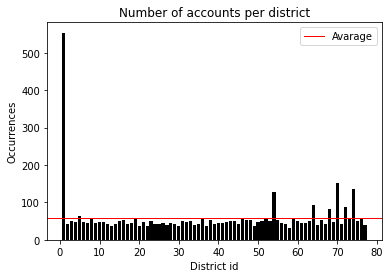

In [4]:
plt.ylabel("Occurrences")
plt.xlabel("District id")
plt.title("Number of accounts per district") 
plt.axhline(y=58, label="Avarage", linewidth=1, color='r')
plt.bar(range(1,78),list(accountDB.pivot_table(columns=["district_id"],aggfunc="size")), color="black", linewidth=0.7)
plt.legend()
plt.savefig("images/DU/account_district_id_occurences")

In [5]:
dId_occ = accountDB.pivot_table(columns=["district_id"],aggfunc="size").to_frame().rename(columns={0:"occurences"})
dId_occ[dId_occ["occurences"] > 58]

,occurences
district_id,
1,554
5,65
46,59
54,128
64,92
68,83
70,152
72,88
74,135


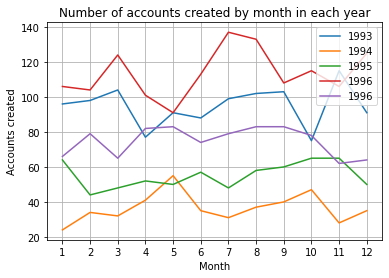

In [6]:
year = accountDB["date"].copy().to_frame()
accountCopy = accountDB.copy()
accountCopy.insert(0,"year", year["date"]//10000)
accountCopy.insert(0,"month",(year["date"]//100 - (year["date"]//10000)*100 ))
accountCopy.insert(0,"day", year["date"] - (year["date"]//100)*100)
accountCopy = accountCopy.drop(columns = ["date"])
plt.title("Number of accounts created by month in each year")
plt.ylabel("Accounts created")
plt.xlabel("Month")
plt.grid()
plt.xticks(range(13))
plt.plot(accountCopy[accountCopy["year"] == 93].pivot_table(columns=["month"], aggfunc="size"), label = "1993")
plt.plot(accountCopy[accountCopy["year"] == 94].pivot_table(columns=["month"], aggfunc="size"), label = "1994")
plt.plot(accountCopy[accountCopy["year"] == 95].pivot_table(columns=["month"], aggfunc="size"), label = "1995")
plt.plot(accountCopy[accountCopy["year"] == 96].pivot_table(columns=["month"], aggfunc="size"), label = "1996")
plt.plot(accountCopy[accountCopy["year"] == 97].pivot_table(columns=["month"], aggfunc="size"), label = "1996")
plt.legend()
plt.savefig("images/DU/account_month_of_creation_per_year")

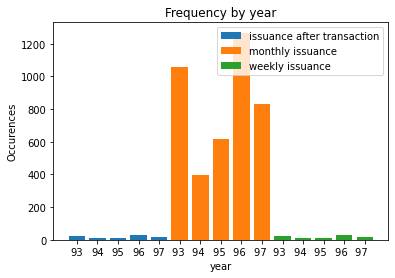

In [7]:
iat = []
iat.append(accountCopy[accountCopy["year"] == 93].pivot_table(columns=["frequency"], aggfunc="size")["issuance after transaction"])
iat.append(accountCopy[accountCopy["year"] == 94].pivot_table(columns=["frequency"], aggfunc="size")["issuance after transaction"])
iat.append(accountCopy[accountCopy["year"] == 95].pivot_table(columns=["frequency"], aggfunc="size")["issuance after transaction"])
iat.append(accountCopy[accountCopy["year"] == 96].pivot_table(columns=["frequency"], aggfunc="size")["issuance after transaction"])
iat.append(accountCopy[accountCopy["year"] == 97].pivot_table(columns=["frequency"], aggfunc="size")["issuance after transaction"])
mi = []
mi.append(accountCopy[accountCopy["year"] == 93].pivot_table(columns=["frequency"], aggfunc="size")["monthly issuance"])
mi.append(accountCopy[accountCopy["year"] == 94].pivot_table(columns=["frequency"], aggfunc="size")["monthly issuance"])
mi.append(accountCopy[accountCopy["year"] == 95].pivot_table(columns=["frequency"], aggfunc="size")["monthly issuance"])
mi.append(accountCopy[accountCopy["year"] == 96].pivot_table(columns=["frequency"], aggfunc="size")["monthly issuance"])
mi.append(accountCopy[accountCopy["year"] == 97].pivot_table(columns=["frequency"], aggfunc="size")["monthly issuance"])
wi = []
wi.append(accountCopy[accountCopy["year"] == 93].pivot_table(columns=["frequency"], aggfunc="size")["weekly issuance"])
wi.append(accountCopy[accountCopy["year"] == 94].pivot_table(columns=["frequency"], aggfunc="size")["weekly issuance"])
wi.append(accountCopy[accountCopy["year"] == 95].pivot_table(columns=["frequency"], aggfunc="size")["weekly issuance"])
wi.append(accountCopy[accountCopy["year"] == 96].pivot_table(columns=["frequency"], aggfunc="size")["weekly issuance"])
wi.append(accountCopy[accountCopy["year"] == 97].pivot_table(columns=["frequency"], aggfunc="size")["weekly issuance"])
plt.title("Frequency by year")
plt.xlabel("year")
plt.ylabel("Occurences")
plt.bar([str(i) for i in range(93,98)], iat, label="issuance after transaction")
plt.bar([str(i)+" " for i in range(93,98)], mi, label="monthly issuance")
plt.bar([str(i)+"  " for i in range(93,98)], iat, label="weekly issuance")
plt.legend()
plt.savefig("images/DU/account_frequency_by_year")

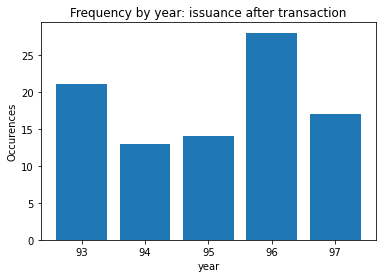

In [8]:
plt.title("Frequency by year: issuance after transaction")
plt.xlabel("year")
plt.ylabel("Occurences")
plt.bar([str(i) for i in range(93,98)], iat, label="issuance after transaction")
plt.savefig("images/DU/account_frequency_iat_by_year")

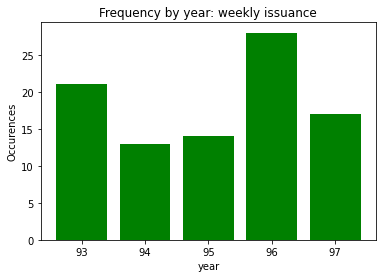

In [9]:
plt.title("Frequency by year: weekly issuance")
plt.xlabel("year")
plt.ylabel("Occurences")
plt.bar([str(i) for i in range(93,98)], iat, color="green", label="weekly issuance")
plt.savefig("images/DU/account_frequency_wi_by_year")

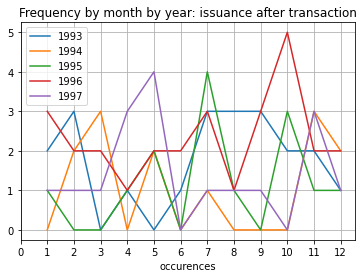

In [10]:
accountMonthFreq = accountCopy[accountCopy["year"] == 93]
accountMonthFreq = accountMonthFreq[accountMonthFreq["frequency"] == "issuance after transaction"].pivot_table(columns=["month"], aggfunc="size")
d = accountMonthFreq.to_dict()
for i in range(1,13):
    if not i in d:
        d[i] = 0
plt.plot(range(1,13), [d[i] for i in range(1,13)], label=1993)

accountMonthFreq = accountCopy[accountCopy["year"] == 94]
accountMonthFreq = accountMonthFreq[accountMonthFreq["frequency"] == "issuance after transaction"].pivot_table(columns=["month"], aggfunc="size")
d = accountMonthFreq.to_dict()
for i in range(1,13):
    if not i in d:
        d[i] = 0
plt.plot(range(1,13), [d[i] for i in range(1,13)], label=1994)

accountMonthFreq = accountCopy[accountCopy["year"] == 95]
accountMonthFreq = accountMonthFreq[accountMonthFreq["frequency"] == "issuance after transaction"].pivot_table(columns=["month"], aggfunc="size")
d = accountMonthFreq.to_dict()
for i in range(1,13):
    if not i in d:
        d[i] = 0
plt.plot(range(1,13), [d[i] for i in range(1,13)], label=1995)

accountMonthFreq = accountCopy[accountCopy["year"] == 96]
accountMonthFreq = accountMonthFreq[accountMonthFreq["frequency"] == "issuance after transaction"].pivot_table(columns=["month"], aggfunc="size")
d = accountMonthFreq.to_dict()
for i in range(1,13):
    if not i in d:
        d[i] = 0
plt.plot(range(1,13), [d[i] for i in range(1,13)], label=1996)

accountMonthFreq = accountCopy[accountCopy["year"] == 97]
accountMonthFreq = accountMonthFreq[accountMonthFreq["frequency"] == "issuance after transaction"].pivot_table(columns=["month"], aggfunc="size")
d = accountMonthFreq.to_dict()
for i in range(1,13):
    if not i in d:
        d[i] = 0
plt.plot(range(1,13), [d[i] for i in range(1,13)], label=1997)
plt.xticks(range(13))
plt.grid()
plt.xlabel("month")
plt.xlabel("occurences")
plt.title("Frequency by month by year: issuance after transaction")
plt.legend()
plt.savefig("images/DU/account_frequency_iat_by_month_by_year")

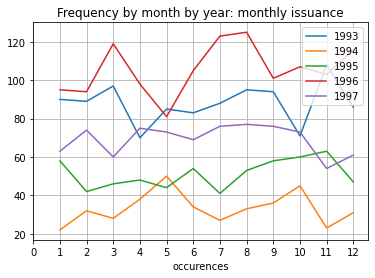

In [11]:
accountMonthFreq = accountCopy[accountCopy["year"] == 93]
frequency = "monthly issuance"
accountMonthFreq = accountMonthFreq[accountMonthFreq["frequency"] == frequency].pivot_table(columns=["month"], aggfunc="size")
d = accountMonthFreq.to_dict()
for i in range(1,13):
    if not i in d:
        d[i] = 0
plt.plot(range(1,13), [d[i] for i in range(1,13)], label=1993)

accountMonthFreq = accountCopy[accountCopy["year"] == 94]
accountMonthFreq = accountMonthFreq[accountMonthFreq["frequency"] == frequency].pivot_table(columns=["month"], aggfunc="size")
d = accountMonthFreq.to_dict()
for i in range(1,13):
    if not i in d:
        d[i] = 0
plt.plot(range(1,13), [d[i] for i in range(1,13)], label=1994)

accountMonthFreq = accountCopy[accountCopy["year"] == 95]
accountMonthFreq = accountMonthFreq[accountMonthFreq["frequency"] == frequency].pivot_table(columns=["month"], aggfunc="size")
d = accountMonthFreq.to_dict()
for i in range(1,13):
    if not i in d:
        d[i] = 0
plt.plot(range(1,13), [d[i] for i in range(1,13)], label=1995)

accountMonthFreq = accountCopy[accountCopy["year"] == 96]
accountMonthFreq = accountMonthFreq[accountMonthFreq["frequency"] == frequency].pivot_table(columns=["month"], aggfunc="size")
d = accountMonthFreq.to_dict()
for i in range(1,13):
    if not i in d:
        d[i] = 0
plt.plot(range(1,13), [d[i] for i in range(1,13)], label=1996)

accountMonthFreq = accountCopy[accountCopy["year"] == 97]
accountMonthFreq = accountMonthFreq[accountMonthFreq["frequency"] == frequency].pivot_table(columns=["month"], aggfunc="size")
d = accountMonthFreq.to_dict()
for i in range(1,13):
    if not i in d:
        d[i] = 0
plt.plot(range(1,13), [d[i] for i in range(1,13)], label=1997)
plt.xticks(range(13))
plt.grid()
plt.xlabel("month")
plt.xlabel("occurences")
plt.title("Frequency by month by year: "+frequency)
plt.legend()
plt.savefig("images/DU/account_frequency_mi_by_month_by_year")

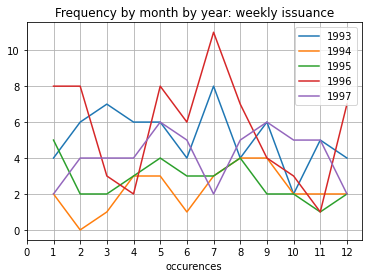

In [12]:
accountMonthFreq = accountCopy[accountCopy["year"] == 93]
frequency = "weekly issuance"
accountMonthFreq = accountMonthFreq[accountMonthFreq["frequency"] == frequency].pivot_table(columns=["month"], aggfunc="size")
d = accountMonthFreq.to_dict()
for i in range(1,13):
    if not i in d:
        d[i] = 0
plt.plot(range(1,13), [d[i] for i in range(1,13)], label=1993)

accountMonthFreq = accountCopy[accountCopy["year"] == 94]
accountMonthFreq = accountMonthFreq[accountMonthFreq["frequency"] == frequency].pivot_table(columns=["month"], aggfunc="size")
d = accountMonthFreq.to_dict()
for i in range(1,13):
    if not i in d:
        d[i] = 0
plt.plot(range(1,13), [d[i] for i in range(1,13)], label=1994)

accountMonthFreq = accountCopy[accountCopy["year"] == 95]
accountMonthFreq = accountMonthFreq[accountMonthFreq["frequency"] == frequency].pivot_table(columns=["month"], aggfunc="size")
d = accountMonthFreq.to_dict()
for i in range(1,13):
    if not i in d:
        d[i] = 0
plt.plot(range(1,13), [d[i] for i in range(1,13)], label=1995)

accountMonthFreq = accountCopy[accountCopy["year"] == 96]
accountMonthFreq = accountMonthFreq[accountMonthFreq["frequency"] == frequency].pivot_table(columns=["month"], aggfunc="size")
d = accountMonthFreq.to_dict()
for i in range(1,13):
    if not i in d:
        d[i] = 0
plt.plot(range(1,13), [d[i] for i in range(1,13)], label=1996)

accountMonthFreq = accountCopy[accountCopy["year"] == 97]
accountMonthFreq = accountMonthFreq[accountMonthFreq["frequency"] == frequency].pivot_table(columns=["month"], aggfunc="size")
d = accountMonthFreq.to_dict()
for i in range(1,13):
    if not i in d:
        d[i] = 0
plt.plot(range(1,13), [d[i] for i in range(1,13)], label=1997)
plt.xticks(range(13))
plt.grid()
plt.xlabel("month")
plt.xlabel("occurences")
plt.title("Frequency by month by year: "+frequency)
plt.legend()
plt.savefig("images/DU/account_frequency_wi_by_month_by_year")

In [13]:
clientDB = pd.read_csv('data/client.csv', sep=";")
clientDB.insert(0, "women",(((clientDB['birth_number'] - ((clientDB['birth_number']//10000 * 10000) + (clientDB['birth_number'] - clientDB['birth_number']//100 * 100)))//100) > 50))
clientDB.insert(0,"age", 1998 - (1900 + clientDB['birth_number']//10000))
clientDB

,age,women,client_id,birth_number,district_id
0,28,True,1,706213,18
1,53,False,2,450204,1
2,58,True,3,406009,1
3,42,False,4,561201,5
4,38,True,5,605703,5
...,...,...,...,...,...
5364,53,True,13955,456030,1
5365,55,False,13956,430406,1
5366,30,False,13968,680413,61
5367,36,True,13971,626019,67


In [234]:
clientDB["age"].mean()

44.80163903892718

In [14]:
clientDB.pivot_table(columns=["women"], aggfunc='size')

women
False    2724
True     2645
dtype: int64

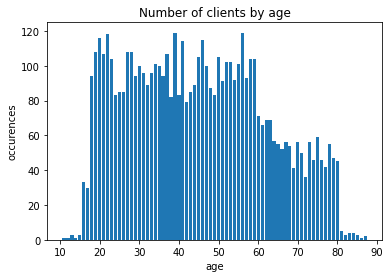

In [15]:
age = list(clientDB.pivot_table(columns=["age"], aggfunc='size'))
plt.xlabel("age")
plt.ylabel("occurences")
plt.title("Number of clients by age")
plt.bar(range(11,88), age)
plt.savefig("images/DU/client_age")

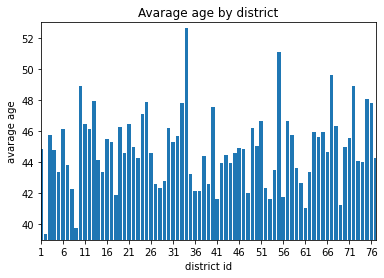

In [16]:
plt.ylim(39,53)
plt.xlim(1,77)
plt.xticks(range(1,78,5))
plt.xlabel("district id")
plt.ylabel("avarage age")
plt.title("Avarage age by district")
plt.bar(range(1,78),clientDB.groupby("district_id")["age"].mean())
plt.savefig("images/DU/client_age_by_district")

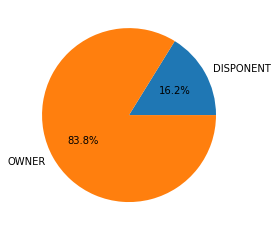

In [80]:
dispositionDB = pd.read_csv('data/disp.csv', sep=";")
plt.pie(dispositionDB.pivot_table(columns=["type"], aggfunc='size'), labels=["DISPONENT","OWNER"], autopct='%1.1f%%')
plt.savefig("images/DU/disposition_type")

In [18]:
districtDB = pd.read_csv('data/district.csv', sep=";")
districtDB.set_index(districtDB.columns[0])

,name,region,no. of inhabitants,no. of municipalities with inhabitants < 499,no. of municipalities with inhabitants 500-1999,no. of municipalities with inhabitants 2000-9999,no. of municipalities with inhabitants >10000,no. of cities,ratio of urban inhabitants,average salary,unemploymant rate '95,unemploymant rate '96,no. of enterpreneurs per 1000 inhabitants,no. of commited crimes '95,no. of commited crimes '96
code,,,,,,,,,,,,,,,
1,Hl.m. Praha,Prague,1204953,0,0,0,1,1,100.0,12541,0.29,0.43,167,85677,99107
2,Benesov,central Bohemia,88884,80,26,6,2,5,46.7,8507,1.67,1.85,132,2159,2674
3,Beroun,central Bohemia,75232,55,26,4,1,5,41.7,8980,1.95,2.21,111,2824,2813
4,Kladno,central Bohemia,149893,63,29,6,2,6,67.4,9753,4.64,5.05,109,5244,5892
5,Kolin,central Bohemia,95616,65,30,4,1,6,51.4,9307,3.85,4.43,118,2616,3040
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,Opava,north Moravia,182027,17,49,12,2,7,56.4,8746,3.33,3.74,90,4355,4433
74,Ostrava - mesto,north Moravia,323870,0,0,0,1,1,100.0,10673,4.75,5.44,100,18782,18347
75,Prerov,north Moravia,138032,67,30,4,2,5,64.6,8819,5.38,5.66,99,4063,4505


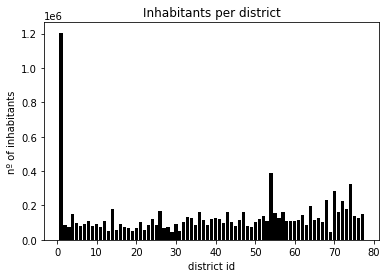

In [37]:
plt.bar(range(1,78),districtDB["no. of inhabitants"], color="black")
plt.xlabel("district id")
plt.ylabel("nº of inhabitants")
plt.title("Inhabitants per district")
plt.savefig("images/DU/districts_inhabitants")

In [20]:
districtDB.columns

Index(['code ', 'name ', 'region', 'no. of inhabitants',
       'no. of municipalities with inhabitants < 499 ',
       'no. of municipalities with inhabitants 500-1999',
       'no. of municipalities with inhabitants 2000-9999 ',
       'no. of municipalities with inhabitants >10000 ', 'no. of cities ',
       'ratio of urban inhabitants ', 'average salary ',
       'unemploymant rate '95 ', 'unemploymant rate '96 ',
       'no. of enterpreneurs per 1000 inhabitants ',
       'no. of commited crimes '95 ', 'no. of commited crimes '96 '],
      dtype='object')

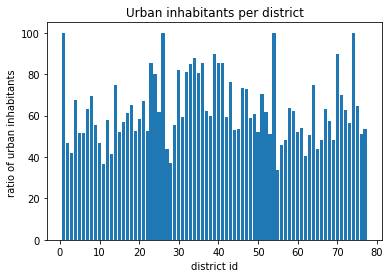

In [21]:
plt.bar(range(1,78),districtDB["ratio of urban inhabitants "])
plt.xlabel("district id")
plt.ylabel("ratio of urban inhabitants ")
plt.title("Urban inhabitants per district")
plt.savefig("images/DU/districts_urbanization")

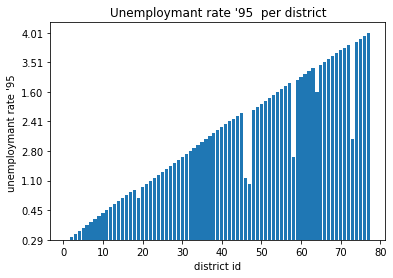

In [22]:
plt.bar(range(1,78),districtDB["unemploymant rate '95 "])
plt.xlabel("district id")
plt.yticks(range(0,80,10))
plt.ylabel("unemploymant rate '95 ")
plt.title("Unemploymant rate '95  per district")
plt.savefig("images/DU/districts_employement95")

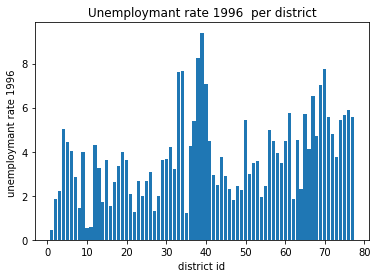

In [23]:
plt.bar(range(1,78),districtDB["unemploymant rate '96 "])
plt.xlabel("district id")
plt.ylabel("unemploymant rate 1996 ")
plt.title("Unemploymant rate 1996  per district")
plt.savefig("images/DU/districts_employement96")

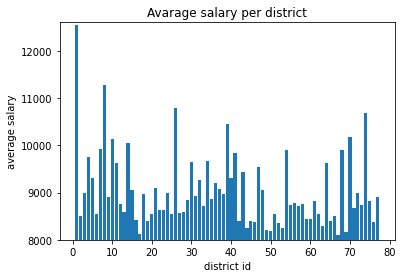

In [34]:
plt.bar(range(1,78),districtDB["average salary "])
plt.xlabel("district id")
plt.ylabel("average salary")
plt.title("Avarage salary per district")
plt.ylim(8000,12600)
plt.savefig("images/DU/districts_average_salary")

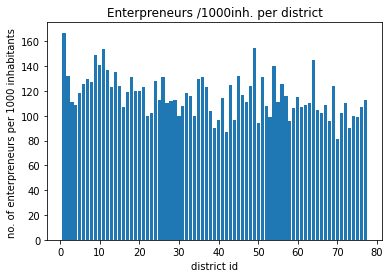

In [36]:
plt.bar(range(1,78),districtDB["no. of enterpreneurs per 1000 inhabitants "])
plt.xlabel("district id")
plt.ylabel("no. of enterpreneurs per 1000 inhabitants ")
plt.title("Enterpreneurs /1000inh. per district")
plt.savefig("images/DU/districts_enterpreneurs")

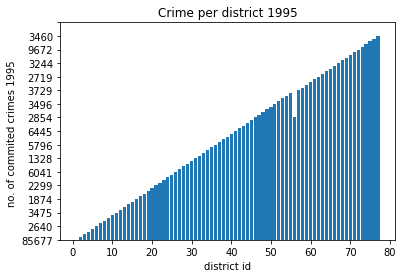

In [50]:
plt.bar(range(1,78),districtDB["no. of commited crimes '95 "])
plt.xlabel("district id")
plt.yticks(range(0,85,5))
plt.ylabel("no. of commited crimes 1995 ")
plt.title("Crime per district 1995")
plt.savefig("images/DU/districts_crime95")

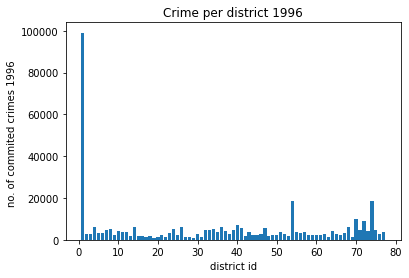

In [51]:
plt.bar(range(1,78),districtDB["no. of commited crimes '96 "])
plt.xlabel("district id")
plt.ylabel("no. of commited crimes 1996 ")
plt.title("Crime per district 1996")
plt.savefig("images/DU/districts_crime96")

In [60]:
loanDB = pd.read_csv('data/loan_train.csv', sep=";")
loanDB

,loan_id,account_id,date,amount,duration,payments,status
0,5314,1787,930705,96396,12,8033,-1
1,5316,1801,930711,165960,36,4610,1
2,6863,9188,930728,127080,60,2118,1
3,5325,1843,930803,105804,36,2939,1
4,7240,11013,930906,274740,60,4579,1
...,...,...,...,...,...,...,...
323,6818,9030,961212,155616,48,3242,1
324,5625,3189,961215,222180,60,3703,-1
325,6805,8972,961221,45024,48,938,1
326,7233,10963,961225,115812,36,3217,1


In [66]:
loanDB.drop(columns=["account_id","loan_id", "duration", "date", "status"]).mean()

amount      145308.621951
payments      4150.932927
dtype: float64

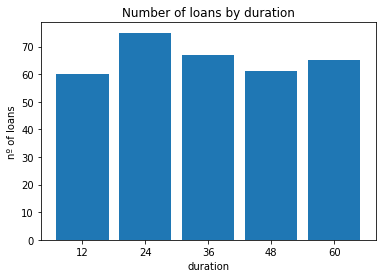

In [75]:
plt.xticks([12,24,36,48,60])
plt.ylabel("nº of loans")
plt.xlabel("duration")
plt.title("Number of loans by duration")
plt.bar([12,24,36,48,60],loanDB.pivot_table(columns="duration", aggfunc="size"), width=10)
plt.savefig("images/DU/loan_durations")

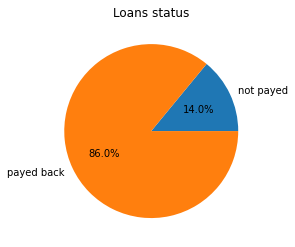

In [76]:
plt.title("Loans status")
plt.pie(loanDB.pivot_table(columns="status", aggfunc="size"), labels=["not payed","payed back"], autopct='%1.1f%%')
plt.savefig("images/DU/loan_status")

In [81]:
transactionDB = pd.read_csv('data/trans_train.csv', sep=";")
transactionDB

/home/iohan-sardinha/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,trans_id,account_id,date,type,operation,amount,balance,k_symbol,bank,account
0,1548749,5270,930113,credit,credit in cash,800.0,800.0,NaN,NaN,NaN
1,1548750,5270,930114,credit,collection from another bank,44749.0,45549.0,NaN,IJ,80269753.0
2,3393738,11265,930114,credit,credit in cash,1000.0,1000.0,NaN,NaN,NaN
3,3122924,10364,930117,credit,credit in cash,1100.0,1100.0,NaN,NaN,NaN
4,1121963,3834,930119,credit,credit in cash,700.0,700.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
396680,515914,1763,961231,withdrawal,withdrawal in cash,14.6,67769.5,payment for statement,NaN,NaN
396681,516262,1765,961231,withdrawal,withdrawal in cash,14.6,19708.1,payment for statement,NaN,NaN
396682,520019,1775,961231,withdrawal,withdrawal in cash,14.6,15944.5,payment for statement,NaN,NaN
396683,517894,1769,961231,withdrawal,withdrawal in cash,14.6,34679.4,payment for statement,NaN,NaN


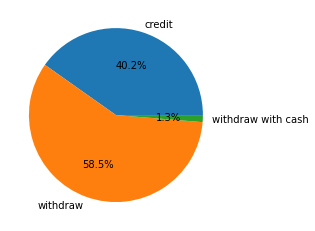

In [85]:
plt.pie(transactionDB.pivot_table(columns="type", aggfunc="size"),labels=["credit","withdraw","withdraw with cash"], autopct='%1.1f%%')
plt.savefig("images/DU/transaction_type")